In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from datetime import datetime,timedelta
import matplotlib.animation as animation
import plotly.graph_objects as go
import plotly.figure_factory as ff
import networkx as nx

In [2]:
path=input('Enter your path: ')

Enter your path: C:\Users\vivek\Desktop\ml\datasets\titanic\train


In [3]:
filename=path+".csv"
df=pd.read_csv(filename,parse_dates=False,infer_datetime_format=False,keep_date_col=True)

files=input("Do you want to import more files(y/n)?")
if files in ['Y','y','yes','Yes','YES']:
    to_continue=True
    if to_continue==True:
        path=input('Enter your path: ')
        filename=path+".csv"
        df1=pd.read_csv(filename,parse_dates=False,infer_datetime_format=False,keep_date_col=True)
        join_concat_merge=input("What action you want to take?:(type one of JOIN,MERGE,CONCAT)")
        join_concat_merge=join_concat_merge.upper()
        if join_concat_merge =='JOIN':
            c=input("On which column")
            h=input("how to join(left,right,outer,inner)")
            h=h.lower()
            df=df.join(df1,on=c,how=h)
                
        if join_concat_merge =='CONCAT':
            c=input("On which column")
            df=pd.concat([df,df1])
        if join_concat_merge =='MERGE':
            c=input("On which column")
            #r=input("On which column from right table")
            #l=input("On which column from left table")
            h=input("how to merge(left,right,outer,inner)")
            h=h.upper()
            df=df.merge(df1,on=c,how=h)
    else:
        to_continue=False

##getting number of columns for later analysis for which chart is more suitable
no_of_columns=len(df.columns)
print(no_of_columns)
#df.shape

Do you want to import more files(y/n)?n
12


In [4]:
dataframe_dtypes=df.dtypes
print("Data type of each column of dataframes : ")
#print(dataframe_dtypes)
columns=dataframe_dtypes.keys().tolist()
columns_datatype=dataframe_dtypes.values.tolist()
#print(columns)
#print(columns_datatype)
print(dict(dataframe_dtypes))

Data type of each column of dataframes : 
{'PassengerId': dtype('int64'), 'Survived': dtype('int64'), 'Pclass': dtype('int64'), 'Name': dtype('O'), 'Sex': dtype('O'), 'Age': dtype('float64'), 'SibSp': dtype('int64'), 'Parch': dtype('int64'), 'Ticket': dtype('O'), 'Fare': dtype('float64'), 'Cabin': dtype('O'), 'Embarked': dtype('O')}


In [5]:
##count no.of columns of each type
#object_type_columns_count=[ for x in dict(dataframe_dtypes).values() if x=='O']
object_type_columns_count=0
float_type_columns_count=0
int_type_columns_count=0
str_type_columns_count=0
bool_type_columns_count=0
datetime_type_columns_count=0
for x in dict(dataframe_dtypes).values():
    if x=='O':
        object_type_columns_count=object_type_columns_count+1
    if x=='int64':
        int_type_columns_count=int_type_columns_count+1
    if x=='float64':
        float_type_columns_count=float_type_columns_count+1
    if x=='str':
        str_type_columns_count=str_type_columns_count+1
    if x=='bool':
        bool_type_columns_count=bool_type_columns_count+1        
print("object type data columns:",object_type_columns_count)
print("int type data columns: ",int_type_columns_count)
print("float type data columns: ",float_type_columns_count)
print("str type data columns: ",str_type_columns_count)
print("bool type data columns: ",bool_type_columns_count)

for key,value in dict(dataframe_dtypes).items():
    #print(key,value)
    if value=='O':
        count_in_mixed_object=df[key].apply(type).value_counts()
        print(key)
        print(count_in_mixed_object.index)
        try:
            difference_between_two_prominent_types_in_mixed=(count_in_mixed_object[0]-count_in_mixed_object[1])
            if difference_between_two_prominent_types_in_mixed > int(len(df)*0.55):
                df[key]=df[key].astype(count_in_mixed_object.index[0])
                print('yeah')
        except:
            pass

object type data columns: 5
int type data columns:  5
float type data columns:  2
str type data columns:  0
bool type data columns:  0
Name
Index([<class 'str'>], dtype='object')
Sex
Index([<class 'str'>], dtype='object')
Ticket
Index([<class 'str'>], dtype='object')
Cabin
Index([<class 'float'>, <class 'str'>], dtype='object')
Embarked
Index([<class 'str'>, <class 'float'>], dtype='object')
yeah


In [6]:
number_of_elements_in_each_column=df.count()
print("Number of elements in each column : ")
print(number_of_elements_in_each_column)
max_count_of_rows=len(df)
print(max_count_of_rows)
dict_number_of_elements_in_each_column=dict(number_of_elements_in_each_column)
print(dict(number_of_elements_in_each_column))
list_columns_with_blank_values=[]
for key,value in dict_number_of_elements_in_each_column.items():
    if value < 891:
        print(key)
        list_columns_with_blank_values.append(key)
print("Columns with blank values:")
print(list_columns_with_blank_values)

Number of elements in each column : 
PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       891
dtype: int64
891
{'PassengerId': 891, 'Survived': 891, 'Pclass': 891, 'Name': 891, 'Sex': 891, 'Age': 714, 'SibSp': 891, 'Parch': 891, 'Ticket': 891, 'Fare': 891, 'Cabin': 204, 'Embarked': 891}
Age
Cabin
Columns with blank values:
['Age', 'Cabin']


In [10]:
print("Select one of the options")
print("type 1:Drop rows with blank values")
print("type 2:Fill blanks with 0")
print("type 3:Fill blanks with mean value")
print("type 4:Drop only those columns")
print("Default is to import data as it is")
choice=int(input("type one of the options:"))

Select one of the options
type 1:Drop rows with blank values
type 2:Fill blanks with 0
type 3:Fill blanks with mean value
type 4:Drop only those columns
Default is to import data as it is
type one of the options:0


In [11]:
print("Your choice is:",choice)
if choice not in [1,2,3,4]:
    print("Moving Forward")
if choice ==1:
    print("Dropping rows with blank values ...")
    df=df.dropna(inplace=True)
if choice ==2:
    print("Filling blanks with 0...")
    df=df.fillna(0,inplace=True)
if choice ==3:
    print("Filling blanks with mean value ...")
    for col in list_columns_with_blank_values:
        try:
            if col.dtype =='O':
                df.col=df.col,fillna(0,inplace=True)
            if col.dtype in ['int64','float64']:
                mean=df.col.mean()
                df.col=df.col.fillna(mean,inplace=True)
            if col.dtype=='str':
                df.col=df.col.fillna(0,inplace=True)
        except:
            pass
            
if choice ==4:
    print("Dropping only those columns(threshold more than 90% are NaN) ...")
    df=df.dropna(axis=1,thresh=0.9,inplace=True)

Your choice is: 0
Moving Forward


In [12]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [13]:
def columns_to_keep(df,col_to_keep):
    df=df.filter(col_to_keep)
    return df
def columns_datatype_to_be_changed(df,col,type_reqd):
    print(col)
    df[col].astype(type_reqd)
    return df

In [14]:
print("Columns available before selection:",columns)
cols_to_drop=list(input("Type columns which you want to drop from analysis :"))
col_to_keep=set(columns)-set(cols_to_drop)
#col_to_keep=[c for c in columns if c not in col_to_drop]
print("Columns available after selection :",)
print(col_to_keep)
columns_to_keep(df,col_to_keep)

Columns available before selection: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
Type columns which you want to drop from analysis :'PassengerId'
Columns available after selection :
{'Ticket', 'Parch', 'Fare', 'SibSp', 'PassengerId', 'Age', 'Cabin', 'Survived', 'Sex', 'Name', 'Embarked', 'Pclass'}


,Ticket,Parch,Fare,SibSp,PassengerId,Age,Cabin,Survived,Sex,Name,Embarked,Pclass
0,A/5 21171,0,7.2500,1,1,22.0,NaN,0,male,"Braund, Mr. Owen Harris",S,3
1,PC 17599,0,71.2833,1,2,38.0,C85,1,female,"Cumings, Mrs. John Bradley (Florence Briggs Th...",C,1
2,STON/O2. 3101282,0,7.9250,0,3,26.0,NaN,1,female,"Heikkinen, Miss. Laina",S,3
3,113803,0,53.1000,1,4,35.0,C123,1,female,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",S,1
4,373450,0,8.0500,0,5,35.0,NaN,0,male,"Allen, Mr. William Henry",S,3
5,330877,0,8.4583,0,6,NaN,NaN,0,male,"Moran, Mr. James",Q,3
6,17463,0,51.8625,0,7,54.0,E46,0,male,"McCarthy, Mr. Timothy J",S,1
7,349909,1,21.0750,3,8,2.0,NaN,0,male,"Palsson, Master. Gosta Leonard",S,3
8,347742,2,11.1333,0,9,27.0,NaN,1,female,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",S,3
9,237736,0,30.0708,1,10,14.0,NaN,1,female,"Nasser, Mrs. Nicholas (Adele Achem)",C,2


In [16]:
yes_no=input("Do you wish to change datatype of any column(y/n)?")

Do you wish to change datatype of any column(y/n)?y


In [17]:
if yes_no in ['Y','y','yes','Yes','YES']:
    to_continue=True
    if to_continue==True:
        col_to_change_datatype=input("Type column to change data type:")
        datatype_reqd=input("Change to ?")
        columns_datatype_to_be_changed(df,col_to_change_datatype,datatype_reqd)
        more_columns=input("More columns(y/n)?")
        if more_columns in ['Y','y','yes','Yes','YES']:
            pass
        else:
            to_continue=False

Type column to change data type:Ticket
Change to ?str
Ticket
More columns(y/n)?n


In [18]:
df.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
dtype: bool

PassengerId
Survived
Pclass
Age
SibSp
Parch
Fare


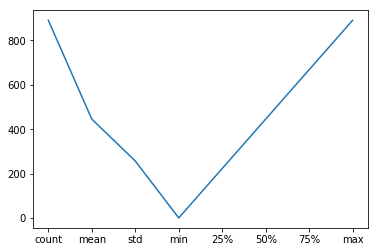

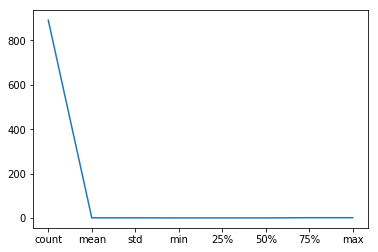

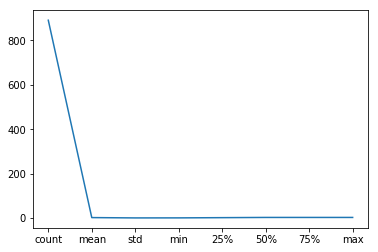

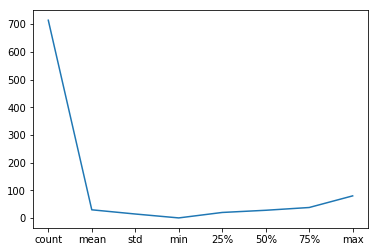

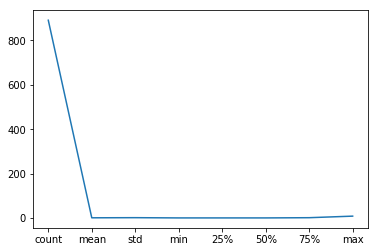

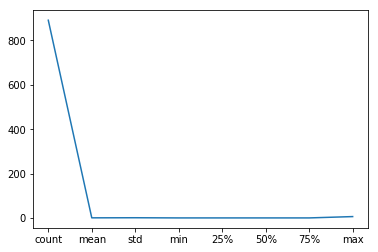

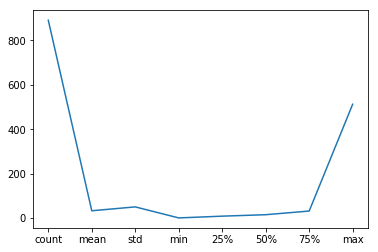

In [19]:
#print(df.describe())
#for col in df.columns:
 #   print(df[col].describe())
    
for key,value in dict(dataframe_dtypes).items():
    
    if value in ['int64','float64']:
        print(key)
        #print(df[key].describe())
        '''print(df[key].describe()['max'])
        print(df[key].describe()['75%'])
        print(df[key].describe()['mean'])
        '''
        plt.figure()
        plt.plot(df[key].describe())
        

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


df.Cabin.apply(type).value_counts()

In [23]:
task=input("what is your intented task()")
audience=input("who is your intended audience")

what is your intented task()ff
who is your intended audienceff


In [ ]:
#!pip install dash

In [ ]:
#!pip install dash-bootstrap-components
 

In [ ]:
#pip install plotly

In [20]:
print("Available intentions are: Comparison,Relationship/Correlation,Distribution,Composition")
intention=input("Intended task is :")
intention=intention.upper()
print(intention)

Available intentions are: Comparison,Relationship/Correlation,Distribution,Composition
Intended task is :Comparison
COMPARISON


In [24]:
print("Available type category are: Basic,Scientific,Financial,Statitical,Map,Time-Series")
category=input("Category is :")
category=category.upper()
print(category)

Available type category are: Basic,Scientific,Financial,Statitical,Map,Time-Series
Category is :Basic
BASIC


In [25]:
import plotly.graph_objects as go
import plotly.figure_factory as ff

In [31]:
import plotly.express as px
def scatter_plot(df,col1,col2):
    fig=px.scatter(df,x=col1,y=col2)
    fig.show()

In [33]:
scatter_plot(df,df.Sex,df.Age)

In [34]:
df_map=pd.read_csv(r'C:\Users\vivek\Downloads\datasets_552239_1006003_world_country_and_usa_states_latitude_and_longitude_values.csv')
df_map.head()

,country_code,latitude,longitude,country,usa_state_code,usa_state_latitude,usa_state_longitude,usa_state
0,AD,42.546245,1.601554,Andorra,AK,63.588753,-154.493062,Alaska
1,AE,23.424076,53.847818,United Arab Emirates,AL,32.318231,-86.902298,Alabama
2,AF,33.939110,67.709953,Afghanistan,AR,35.201050,-91.831833,Arkansas
3,AG,17.060816,-61.796428,Antigua and Barbuda,AZ,34.048928,-111.093731,Arizona
4,AI,18.220554,-63.068615,Anguilla,CA,36.778261,-119.417932,California


In [36]:
bbox=(df_map.longitude.min(),df_map.longitude.max(),df_map.latitude.min(),df_map.latitude.max())
bbox

(-177.156097, 179.414413, -75.250973, 77.553604)

In [37]:
map_m=plt.imread(r'C:\Users\vivek\Downloads\map.png')

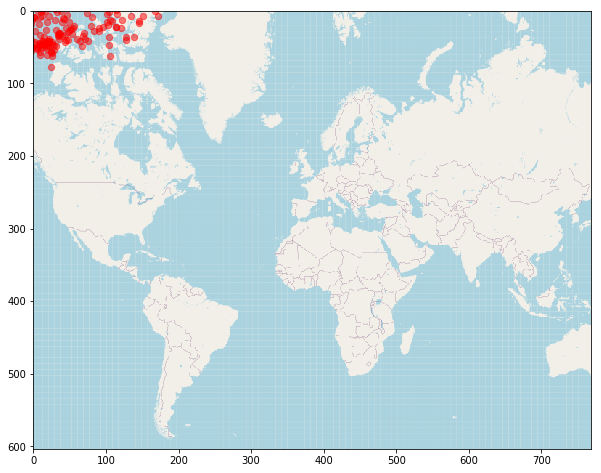

In [40]:
fig,ax=plt.subplots(figsize=(10,9))
ax.scatter(df_map.longitude,df_map.latitude,zorder=1,alpha=0.5,c='r',s=40)
ax.imshow(map_m)